In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [3]:
data = pd.read_csv(r"..\Dataset Preparation\FinalData.csv")

In [4]:
data.head()

Exp   Folder   Mode  Frame     MeanR      VarR  MinR  Q1R  \
0  18_09_2024_2gSodium  01_Full  Degen   1270  0.011956  0.129460   0.0  0.0   
1  18_09_2024_2gSodium  01_Full  Degen   1271  0.009799  0.095385   0.0  0.0   
2  18_09_2024_2gSodium  01_Full  Degen   1272  0.011616  0.113608   0.0  0.0   
3  18_09_2024_2gSodium  01_Full  Degen   1273  0.009920  0.092299   0.0  0.0   
4  18_09_2024_2gSodium  01_Full  Degen   1274  0.009822  0.094579   0.0  0.0   

   MedR  Q3R  ...     VarIR  MinIR      Q1IR     MedIR      Q3IR     MaxIR  \
0   0.0  0.0  ...  1.138393    0.0  1.242808  1.196550  1.211091  1.044270   
1   0.0  0.0  ...  1.138973    0.0  1.242930  1.196922  1.211649  1.042752   
2   0.0  0.0  ...  1.139380    0.0  1.243419  1.196984  1.211622  1.036582   
3   0.0  0.0  ...  1.138379    0.0  1.244232  1.196922  1.210374  1.038002   
4   0.0  0.0  ...  1.138545    0.0  1.242483  1.197728  1.210693  1.047502   

     SkewIR    KurtIR  PtsIR  Concentration  
0  1.773443  0.983807    1.0    2030.110000  
1  1.774462  0.980042    1.0    2022.796748  
2  1.771977  0.982781    1.0    2015.548649  
3  1.771729  0.985877    1.0    2008.365266  
4  1.768001  0.984631    1.0    2001.246166  

[5 rows x 45 columns]

In [6]:
exp_list = list(data['Exp'].unique())
df0 = data[data['Exp'] == exp_list[0]]
df1 = data[data['Exp'] == exp_list[1]]
df2 = data[data['Exp'] == exp_list[2]]
df3 = data[data['Exp'] == exp_list[3]]

In [12]:
df3.head()

Exp Folder   Mode  Frame     MeanR      VarR  \
11078  08_04_2024_2gSodiumForDA     01  Degen      0  0.376693  0.592468   
11079  08_04_2024_2gSodiumForDA     01  Degen      1  0.414604  0.656142   
11080  08_04_2024_2gSodiumForDA     01  Degen      2  0.417792  0.658309   
11081  08_04_2024_2gSodiumForDA     01  Degen      3  0.420072  0.660808   
11082  08_04_2024_2gSodiumForDA     01  Degen      4  0.424266  0.661822   

       MinR  Q1R  MedR  Q3R  ...     VarIR  MinIR      Q1IR     MedIR  \
11078   0.0  0.0   0.0  0.0  ...  0.878873    0.0  1.090731  1.072896   
11079   0.0  0.0   0.0  0.0  ...  0.923482    0.0  1.202325  1.163367   
11080   0.0  0.0   0.0  0.0  ...  0.924298    0.0  1.201814  1.163112   
11081   0.0  0.0   0.0  0.0  ...  0.924288    0.0  1.202496  1.164324   
11082   0.0  0.0   0.0  0.0  ...  0.923711    0.0  1.201090  1.163367   

           Q3IR     MaxIR    SkewIR    KurtIR  PtsIR  Concentration  
11078  1.105961  0.821868  0.054752  0.478513    1.0      58.550000  
11079  1.164930  0.908790  0.049616  0.579021    1.0      58.458168  
11080  1.166171  0.903935  0.048686  0.576418    1.0      58.366504  
11081  1.165261  0.913372  0.049185  0.577743    1.0      58.275008  
11082  1.164654  0.907012  0.050882  0.577495    1.0      58.183681  

[5 rows x 45 columns]

In [70]:
features = list(df0.describe().columns[1:-1])
target = 'Concentration'
len(features)

40

# EDA - Experiment 1 Data

## UVA

In [56]:
def plot_uva(df, features, v_dim = 4, plot_type='line'):
    # Plot side by side
    h_dim = math.ceil(len(features) / v_dim)
    fig, axes = plt.subplots(nrows=h_dim, ncols=v_dim, figsize=(12, 3 * h_dim))
    for i, ax in enumerate(axes.flat):
        if plot_type == 'line' :
            ax.plot(df[features[i]])
        else:
            sns.boxplot(data=df, y=features[i], ax=ax)
        ax.set_title(features[i])
        ax.grid(True)

    plt.tight_layout()
    plt.show()

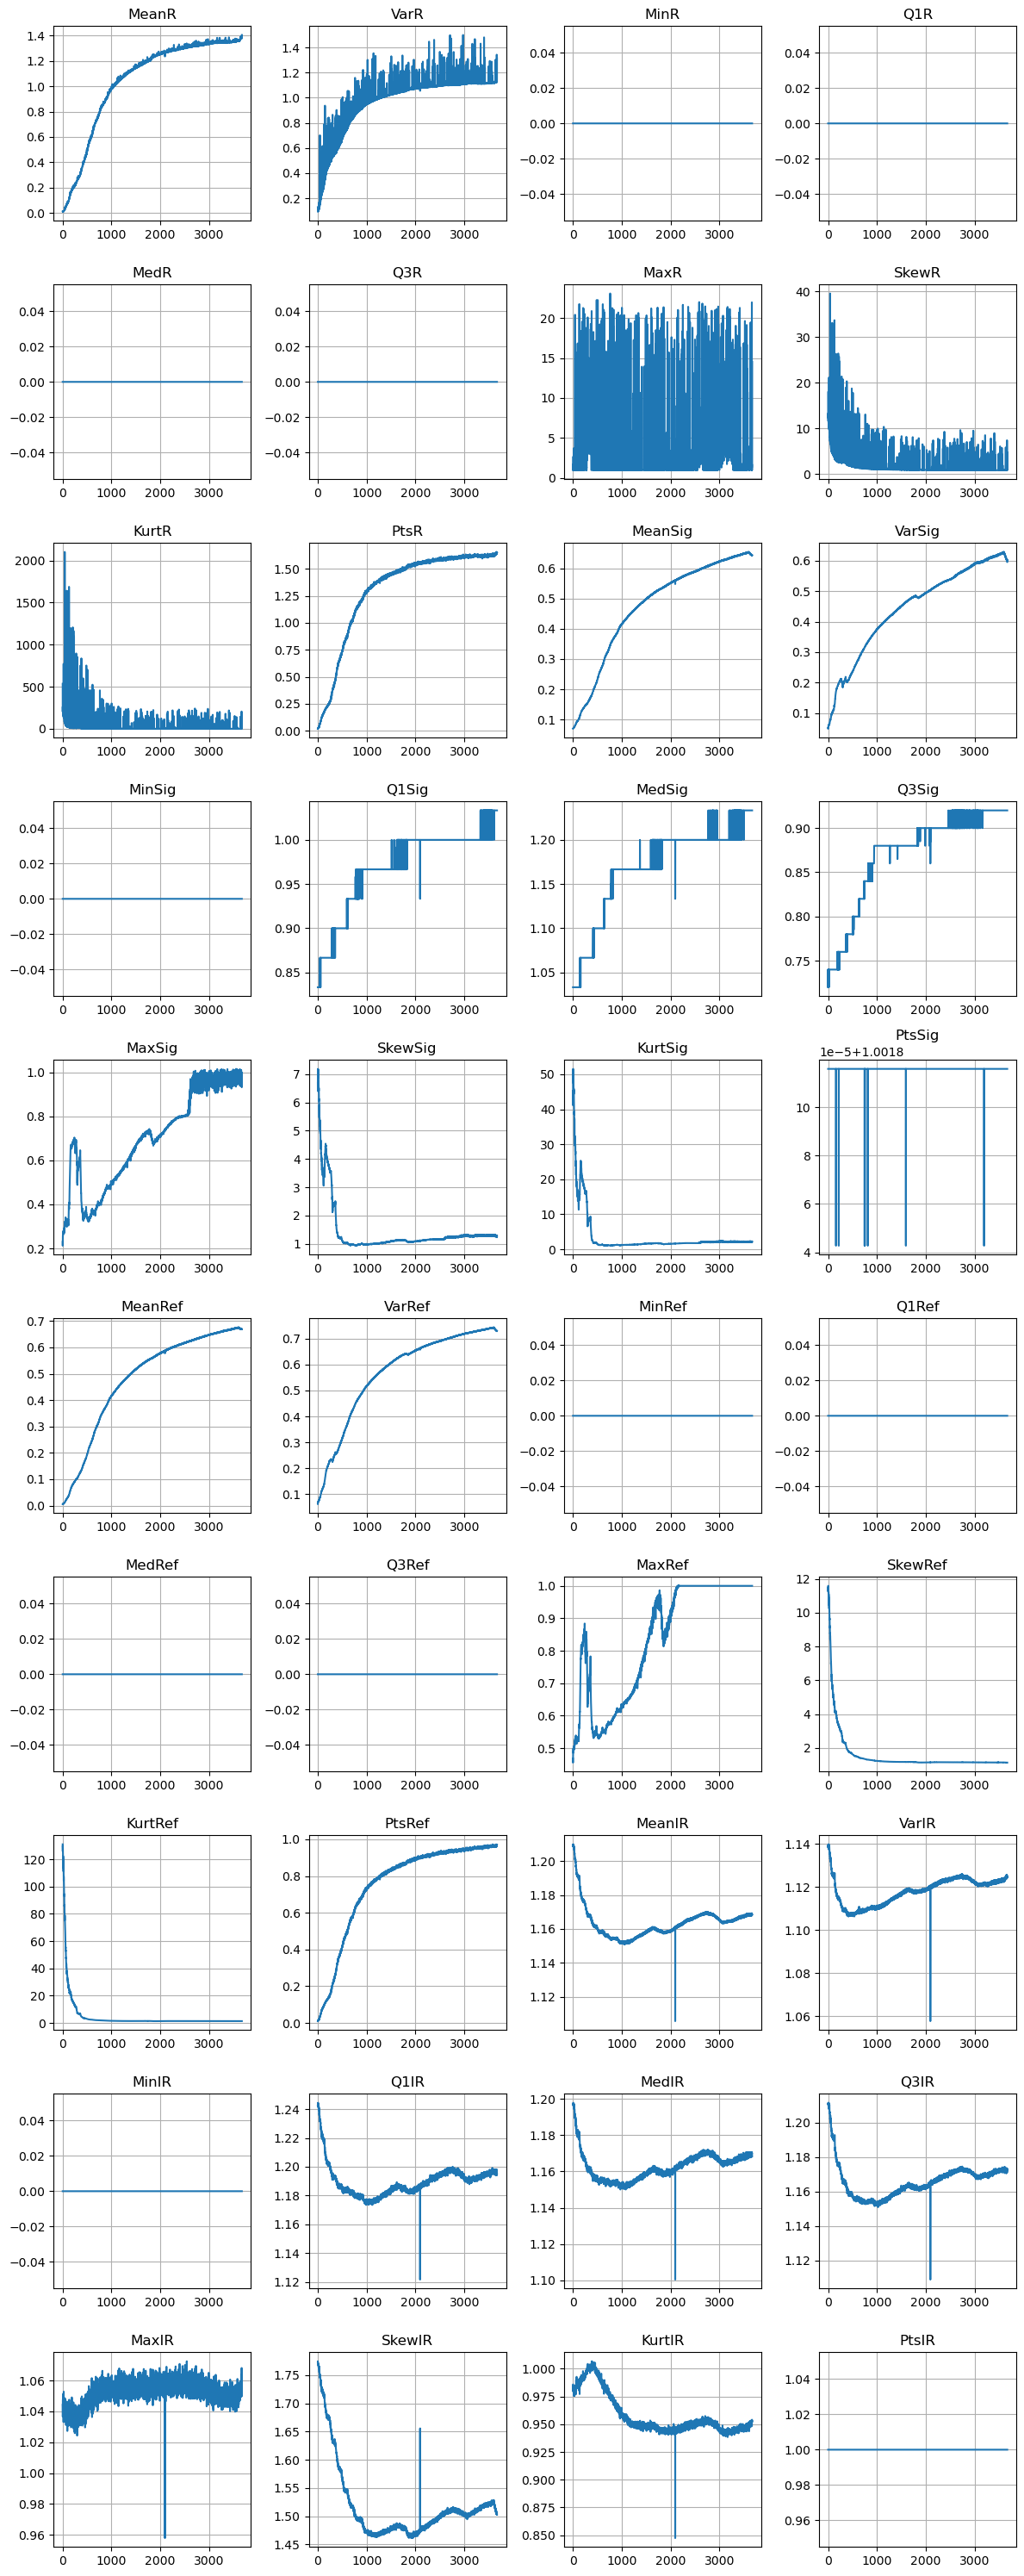

In [50]:
plot_uva(df0, features)

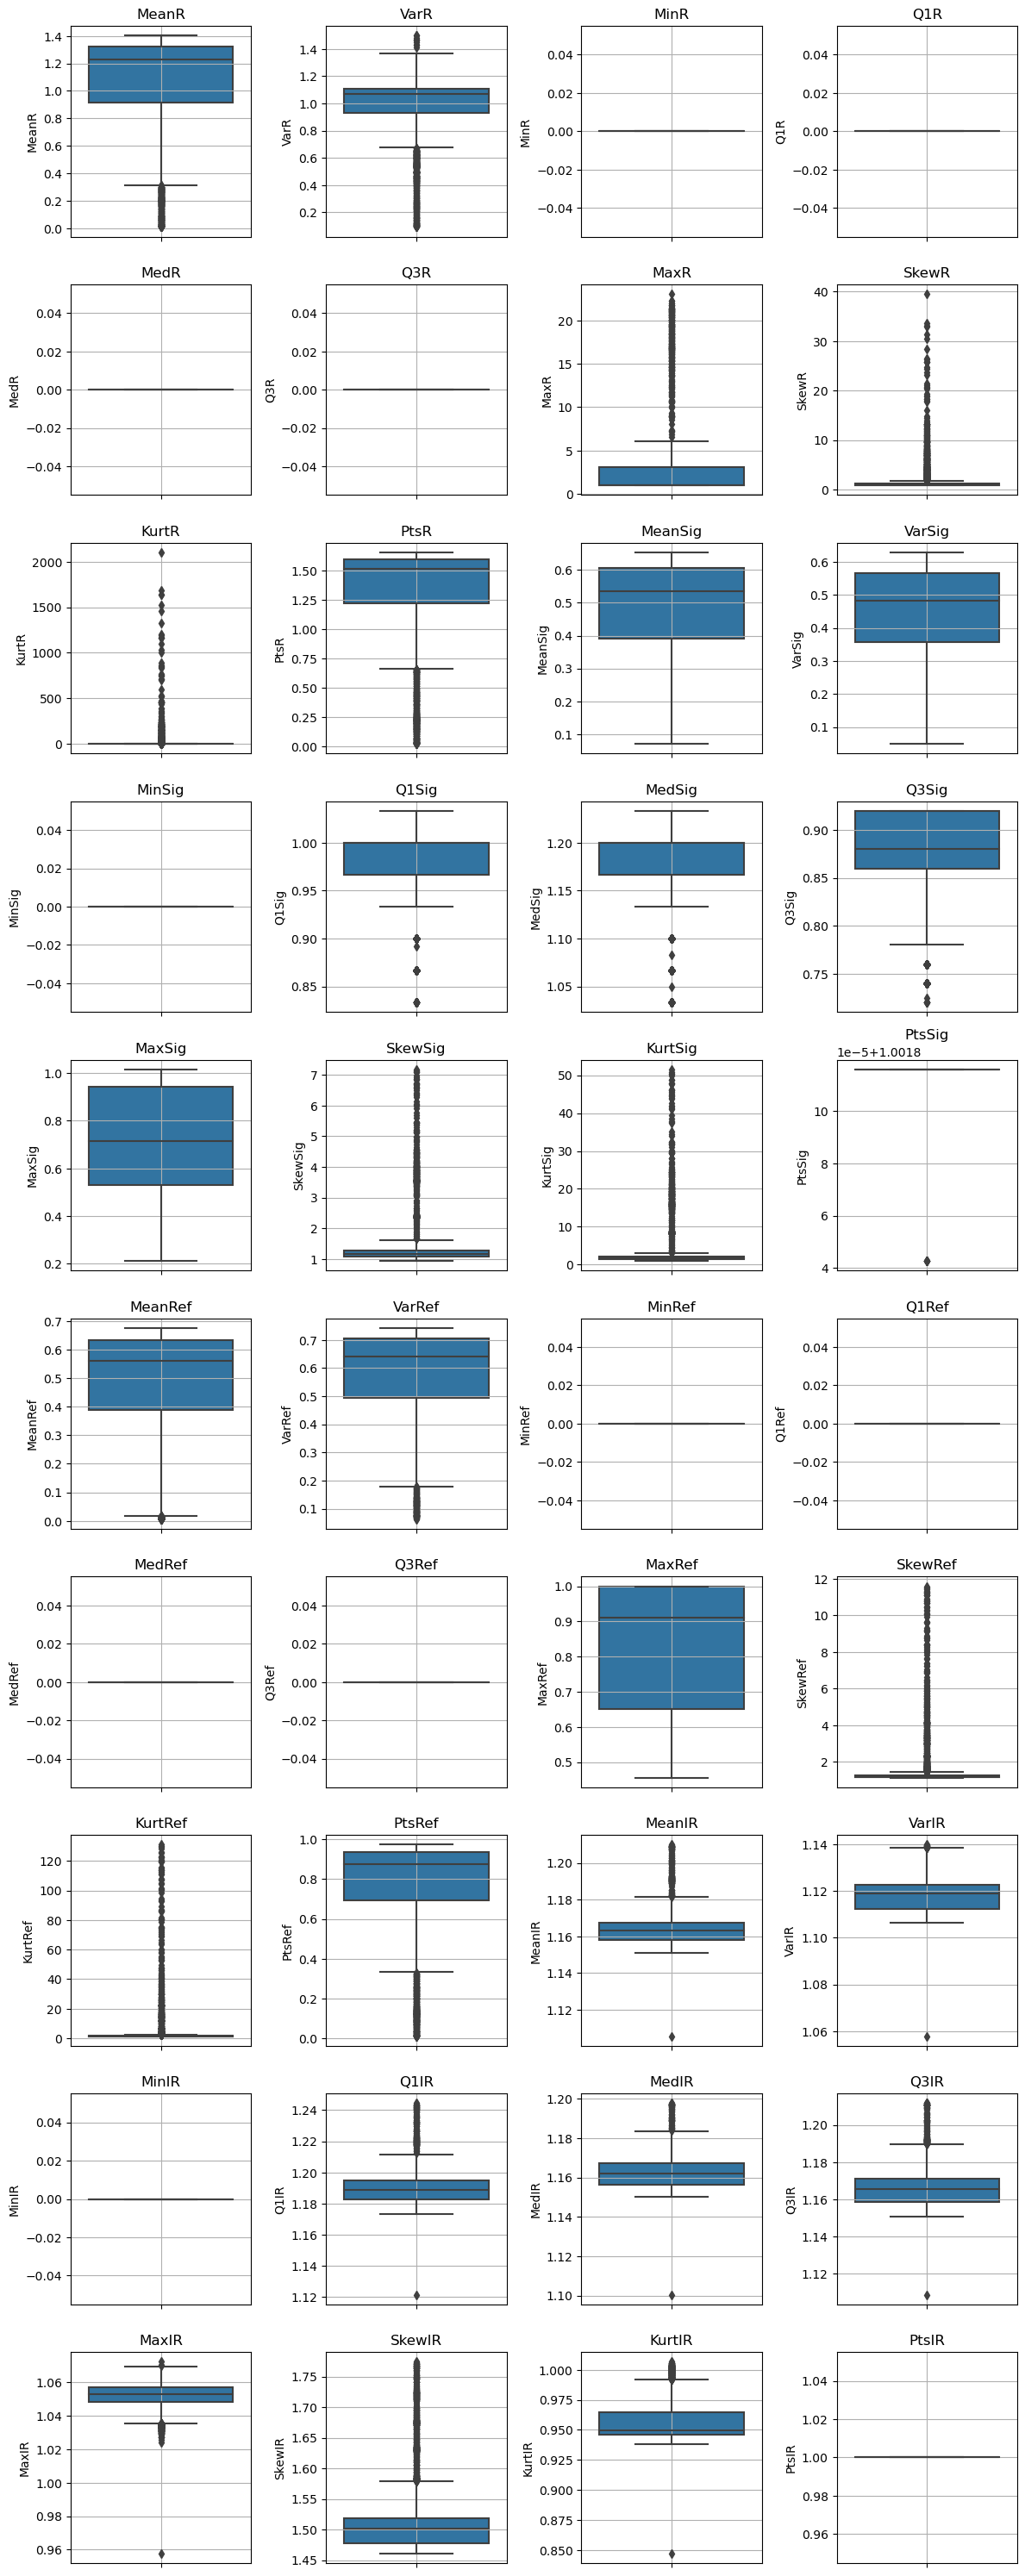

In [57]:
plot_uva(df0, features, plot_type='box')

In [105]:
df0.iloc[2090:2095]

Exp   Folder   Mode  Frame     MeanR      VarR  MinR  \
2090  18_09_2024_2gSodium  01_Full  Degen   3360  1.264171  1.077494   0.0   
2091  18_09_2024_2gSodium  01_Full  Degen   3361  1.264582  1.078275   0.0   
2092  18_09_2024_2gSodium  01_Full  Degen   3362  1.266207  1.077027   0.0   
2093  18_09_2024_2gSodium  01_Full  Degen   3363  1.234483  1.055179   0.0   
2094  18_09_2024_2gSodium  01_Full  Degen   3364  1.265881  1.080731   0.0   

      Q1R  MedR  Q3R  ...     VarIR  MinIR      Q1IR     MedIR      Q3IR  \
2090  0.0   0.0  0.0  ...  1.119397    0.0  1.186291  1.161238  1.164488   
2091  0.0   0.0  0.0  ...  1.119682    0.0  1.186291  1.161361  1.163824   
2092  0.0   0.0  0.0  ...  1.120250    0.0  1.185192  1.162724  1.164382   
2093  0.0   0.0  0.0  ...  1.057775    0.0  1.121514  1.100400  1.108804   
2094  0.0   0.0  0.0  ...  1.119656    0.0  1.186454  1.160990  1.164356   

         MaxIR    SkewIR    KurtIR  PtsIR  Concentration  
2090  1.052449  1.477075  0.944836    1.0     217.471442  
2091  1.061851  1.475773  0.943311    1.0     217.737526  
2092  1.062194  1.476088  0.944437    1.0     218.003653  
2093  0.957835  1.655517  0.847402    1.0     218.269822  
2094  1.058472  1.472501  0.946103    1.0     218.536032  

[5 rows x 45 columns]

## BVA

In [61]:
#Target vs Features
def plot_bva(df, features, target, v_dim = 2, plot_type='scatter'):
    h_dim = math.ceil(len(features) / v_dim)
    fig, axes = plt.subplots(nrows=h_dim, ncols=v_dim, figsize=(12, 3 * h_dim))
    for i, ax in enumerate(axes.flat):
        if plot_type == 'scatter' :
            sns.scatterplot(data=df, y=target, x=features[i], ax=ax)
        else:
            pass
        ax.set_title(features[i])
        ax.grid(True)

    plt.tight_layout()
    plt.show()

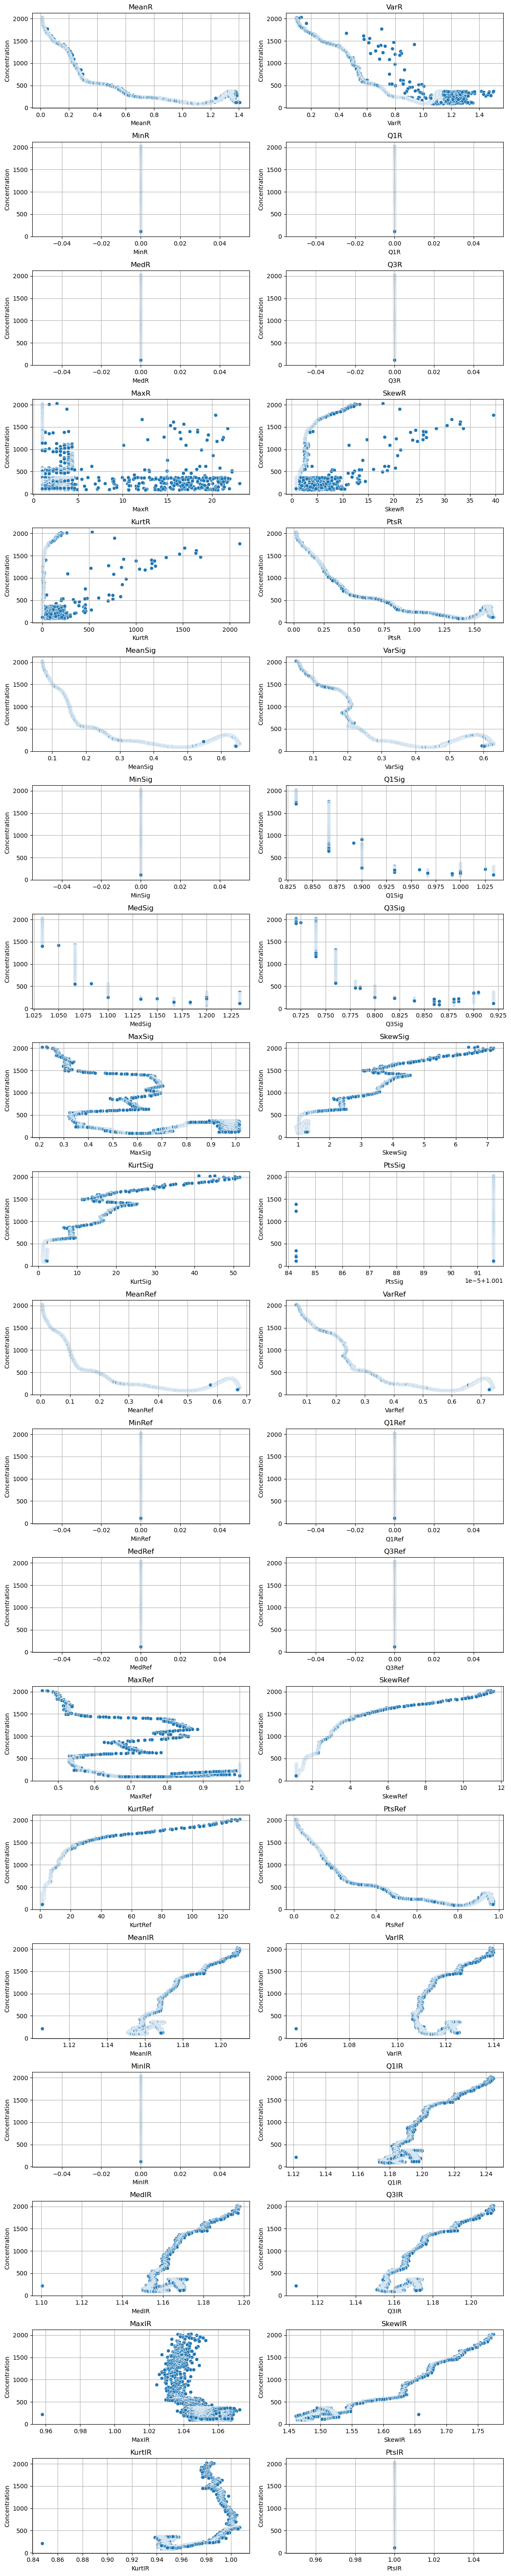

In [62]:
plot_bva(df0, features, target)

## Correlation with Features

In [170]:
def plot_corr(df, features, target=None, plot_type='Target'):
    plt.figure(figsize=(12,1))
    if plot_type == 'Target':
        corr_res = df[features + [target]].corr().dropna(how='all',axis=1).iloc[-1]
    else:
        corr_df = df[features].corr().dropna(how='all').dropna(how='all',axis=1)
        corr_bin= corr_df.applymap(lambda x: 1 if abs(x) > 0.5 else 0)
        corr_res = corr_bin.sum(axis=1).sort_values()
    ax = sns.heatmap(corr_res.to_frame().T, annot=True, cmap="viridis", linewidths=0.5) #, xticklabels=series.index, yticklabels=["Series"])
    for text in ax.texts:
        text.set_rotation(90)  # Rotate text to vertical
        text.set_fontsize(8)   # Adjust font size if neede

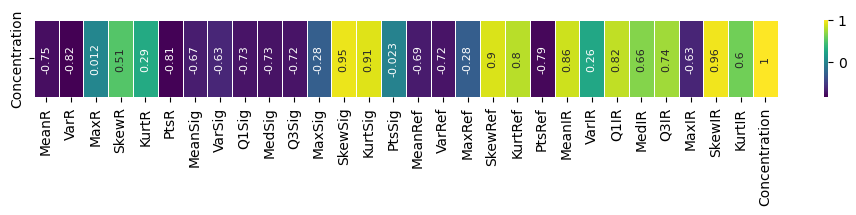

In [171]:
corr_res = plot_corr(df0, features, target)

## Features interdependancy

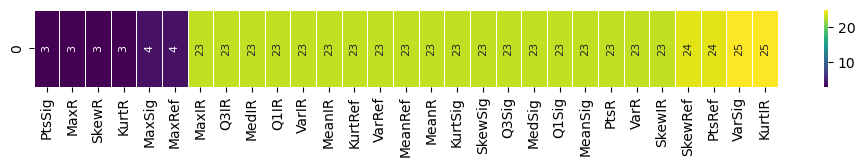

In [162]:
plot_corr(df3, features, plot_type='Features')

# EDA - Experiment 2 Data

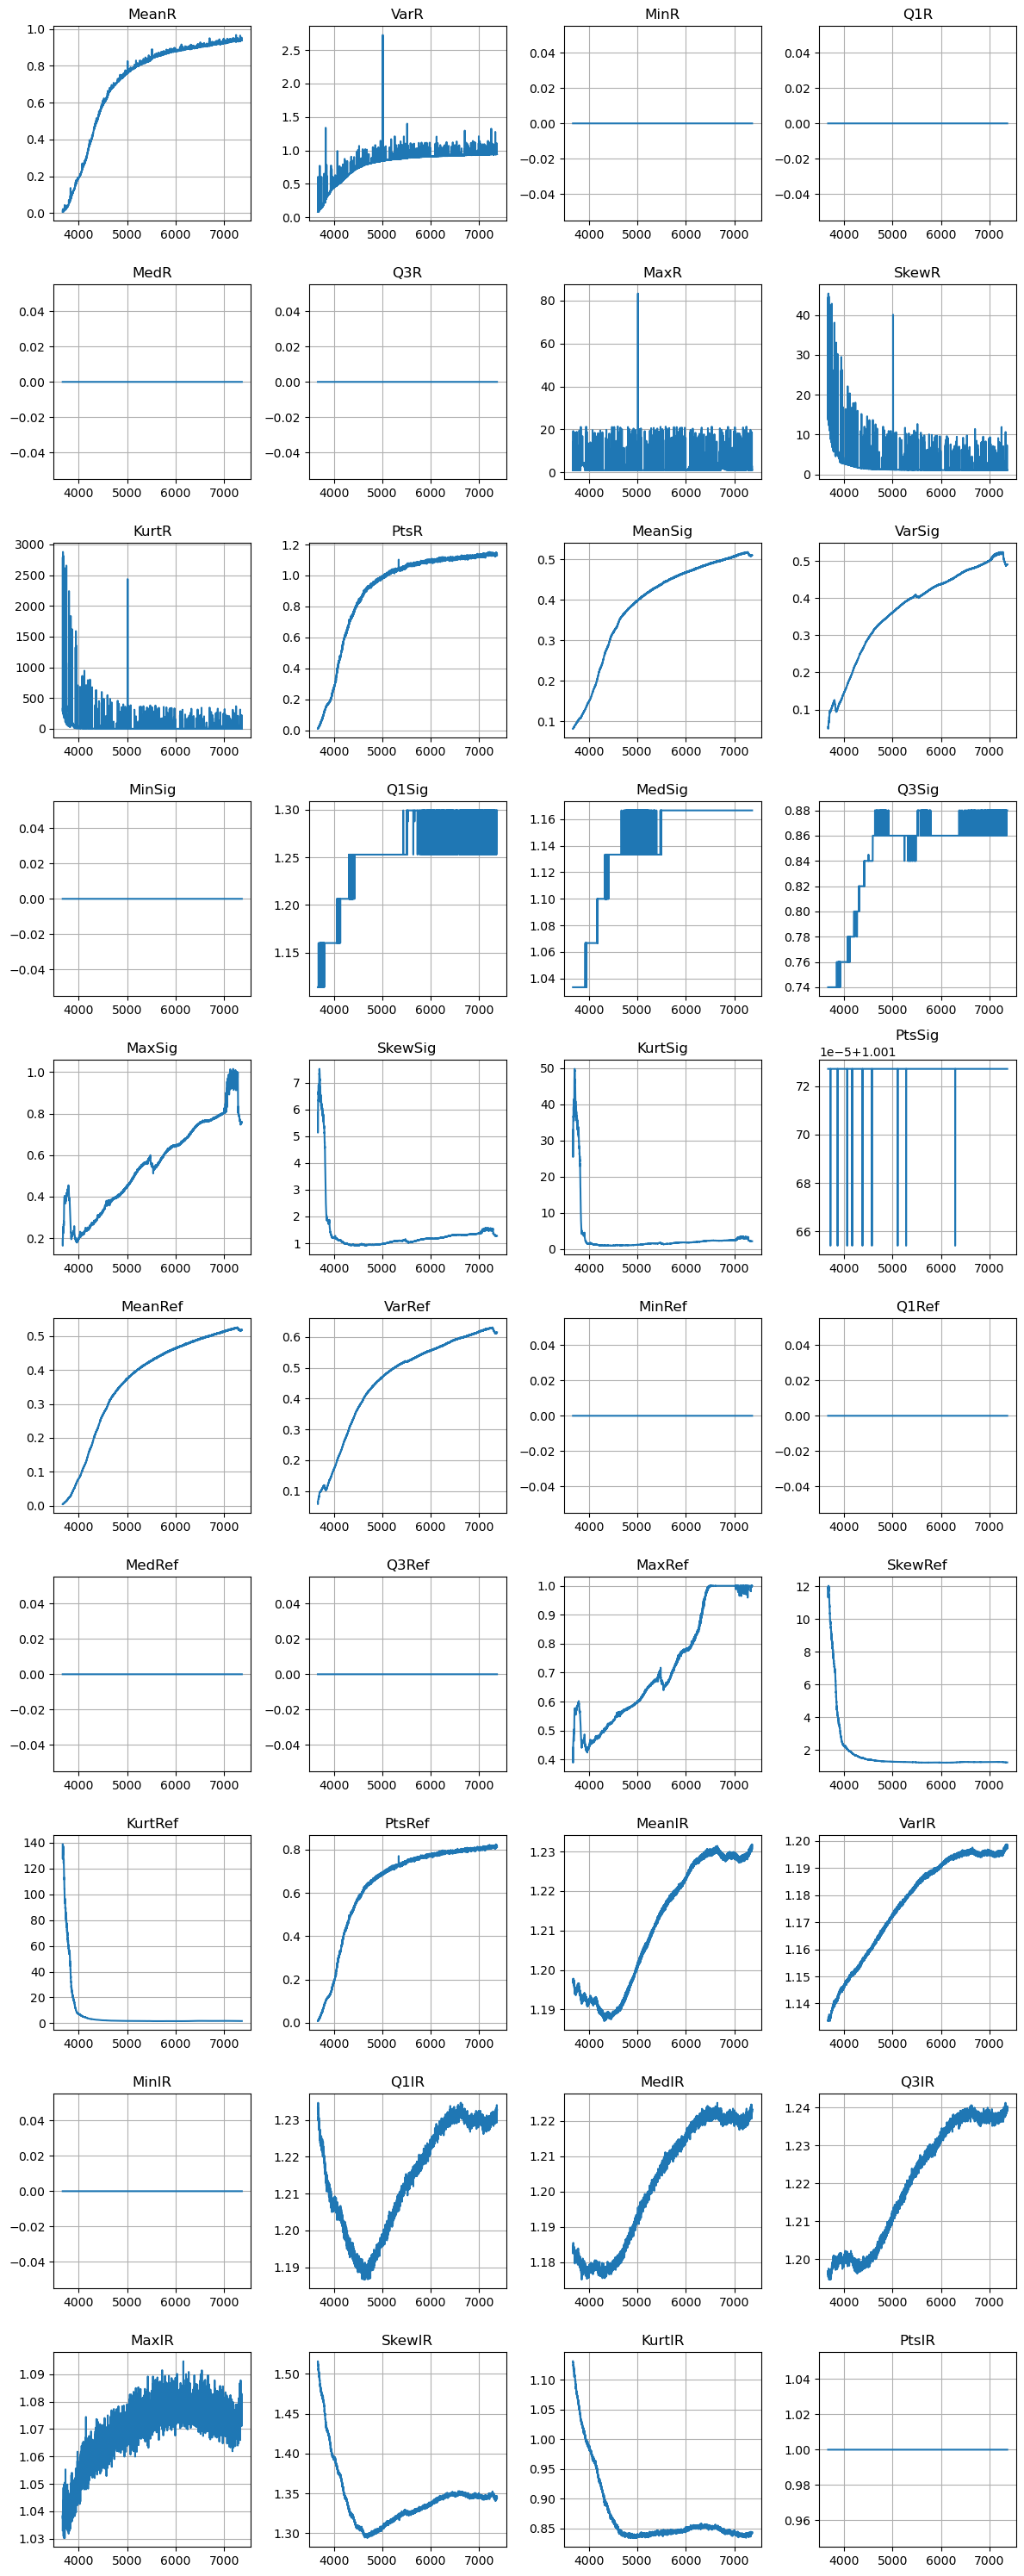

In [91]:
plot_uva(df1, features)

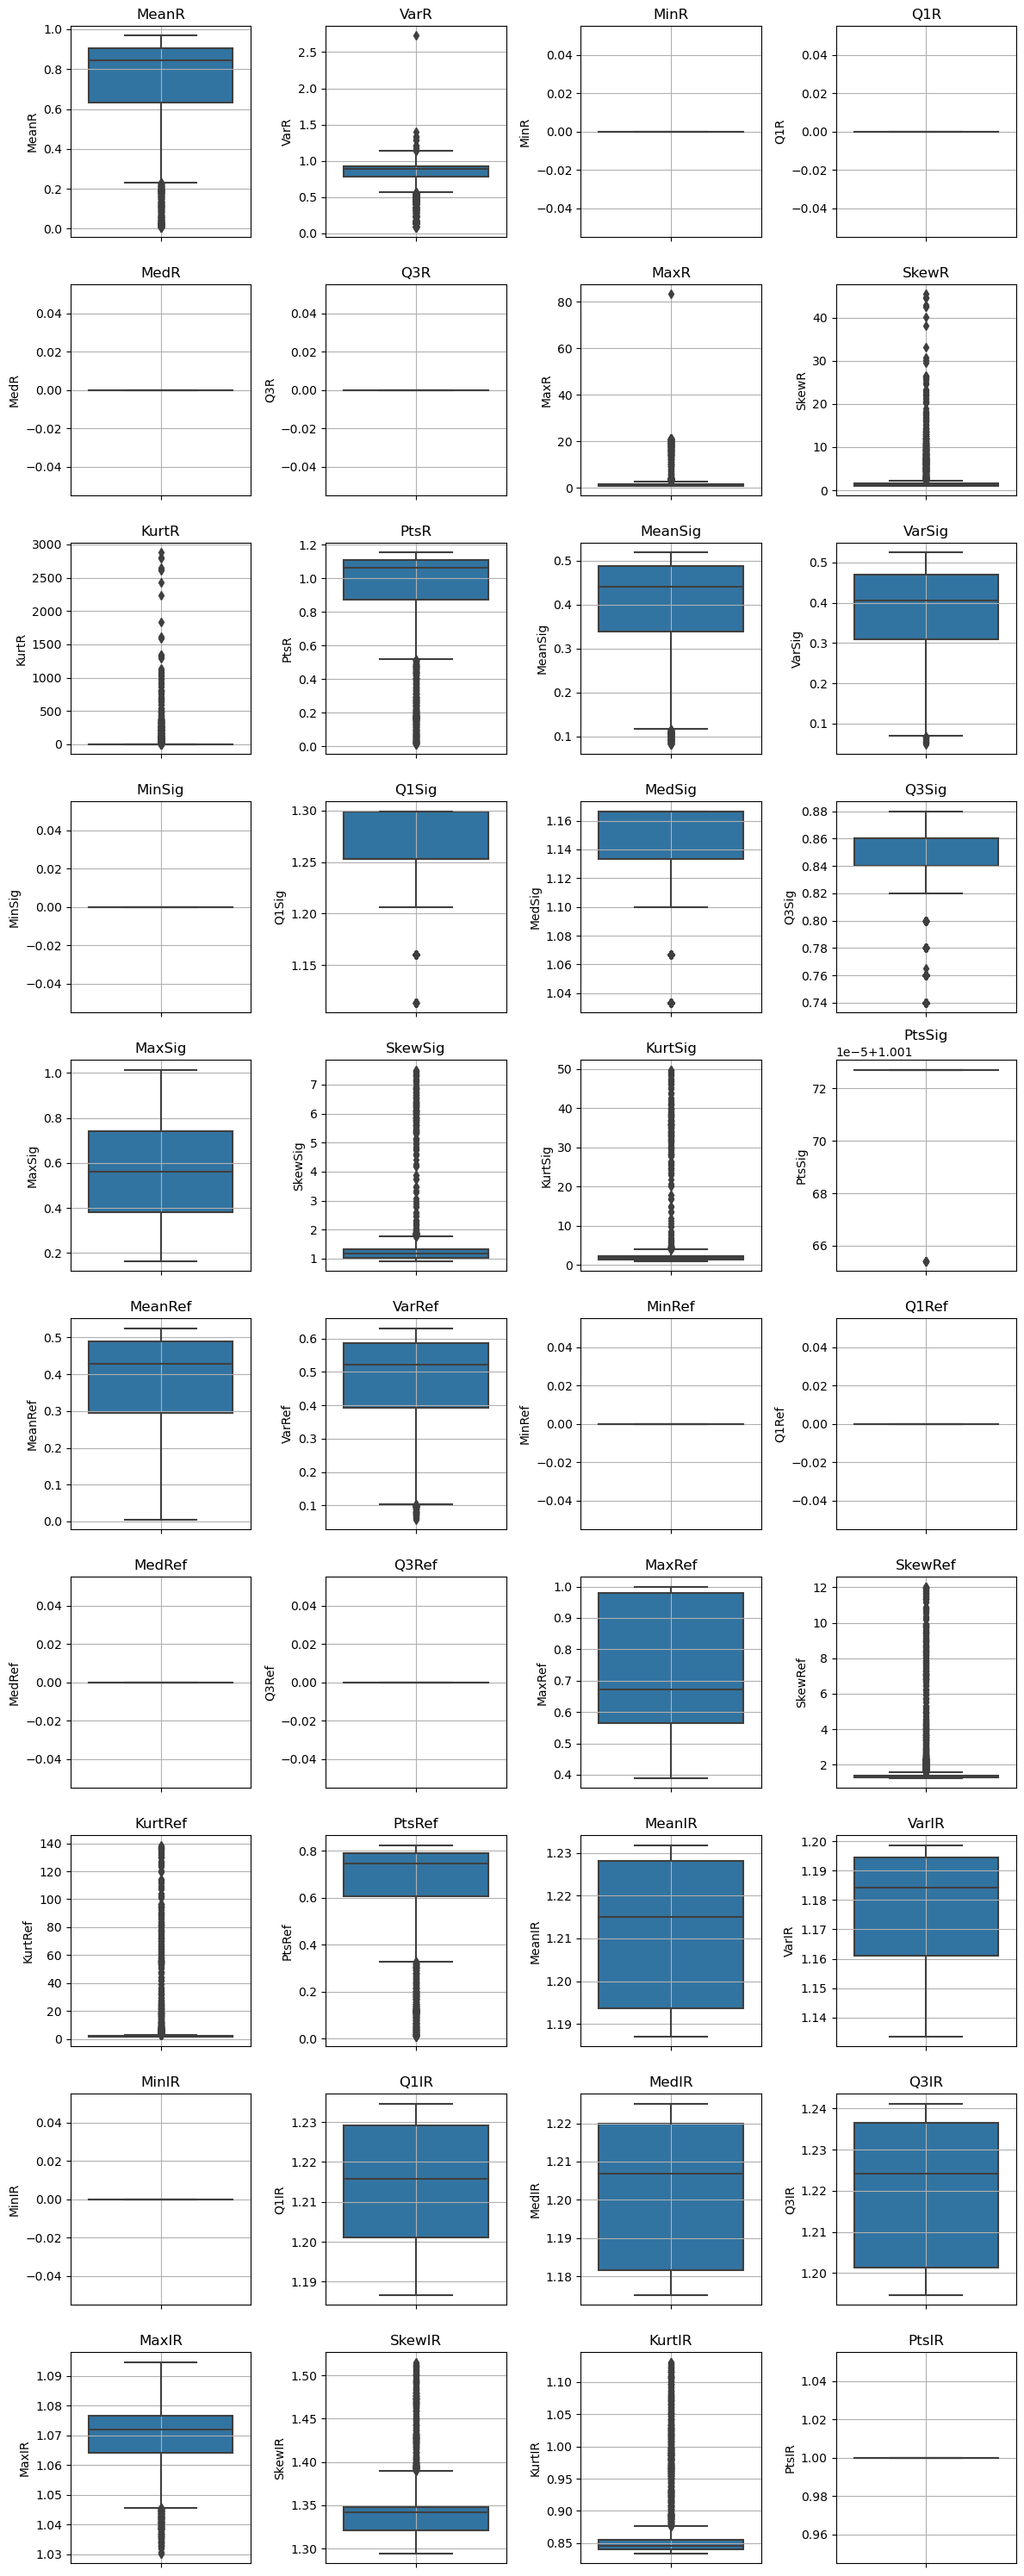

In [92]:
plot_uva(df1, features, plot_type='box')

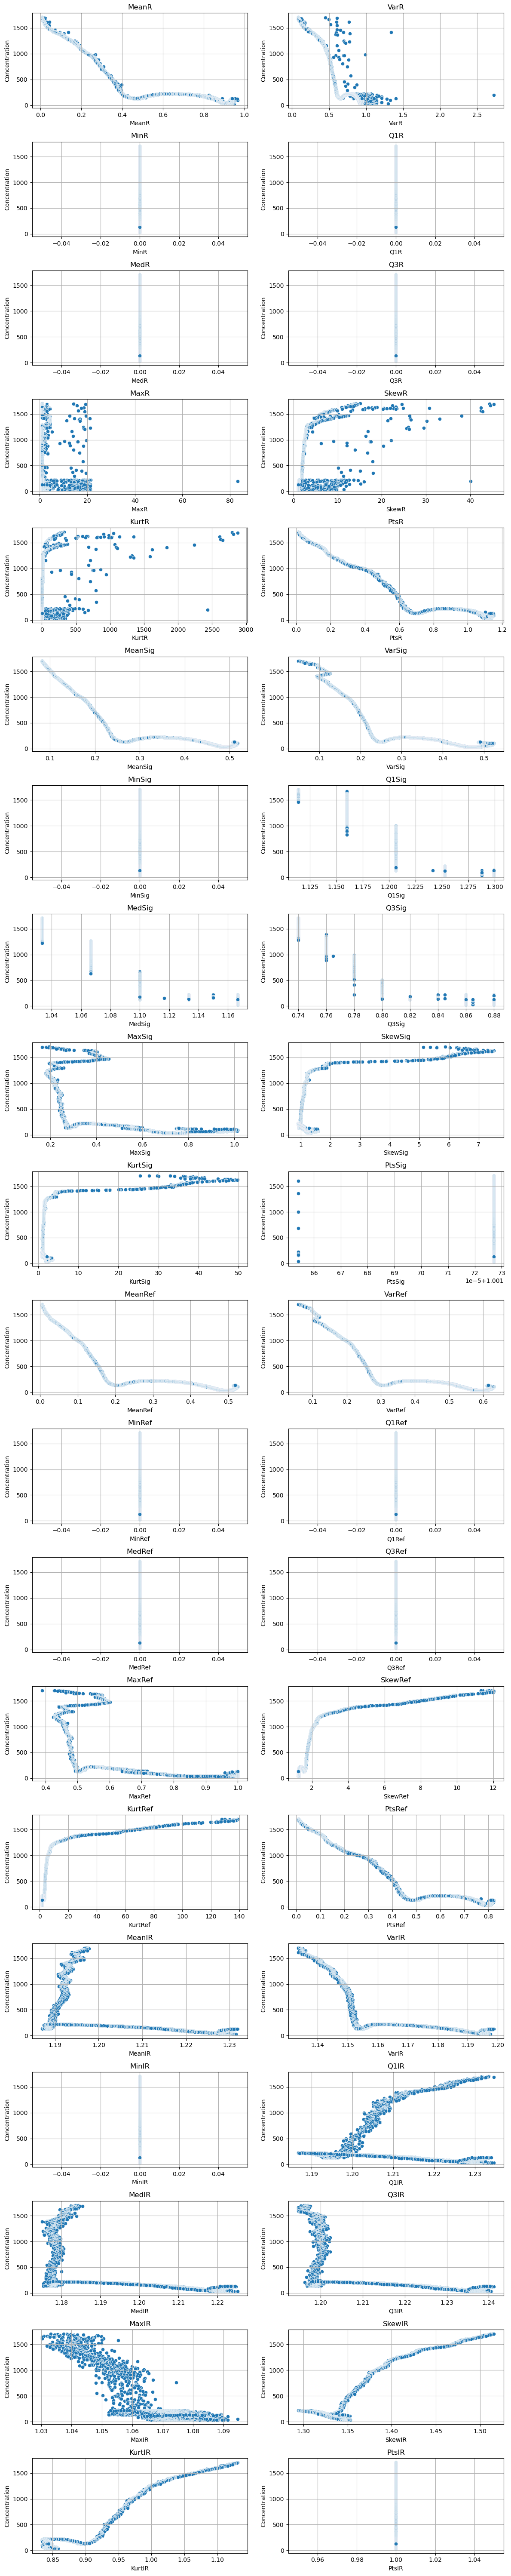

In [93]:
plot_bva(df1, features, target)

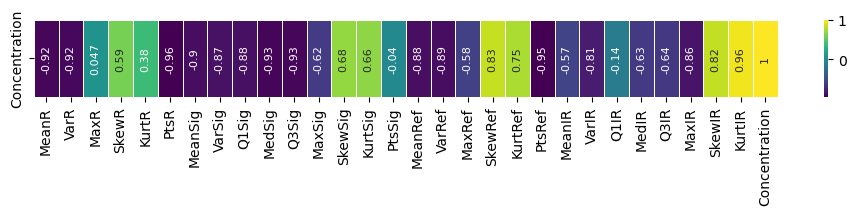

In [177]:
corr_res = plot_corr(df1, features, target)

## Features interdependancy

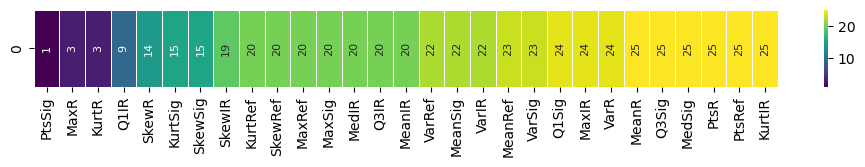

In [172]:
plot_corr(df1, features, plot_type='Features')

# EDA - Experiment 3 Data

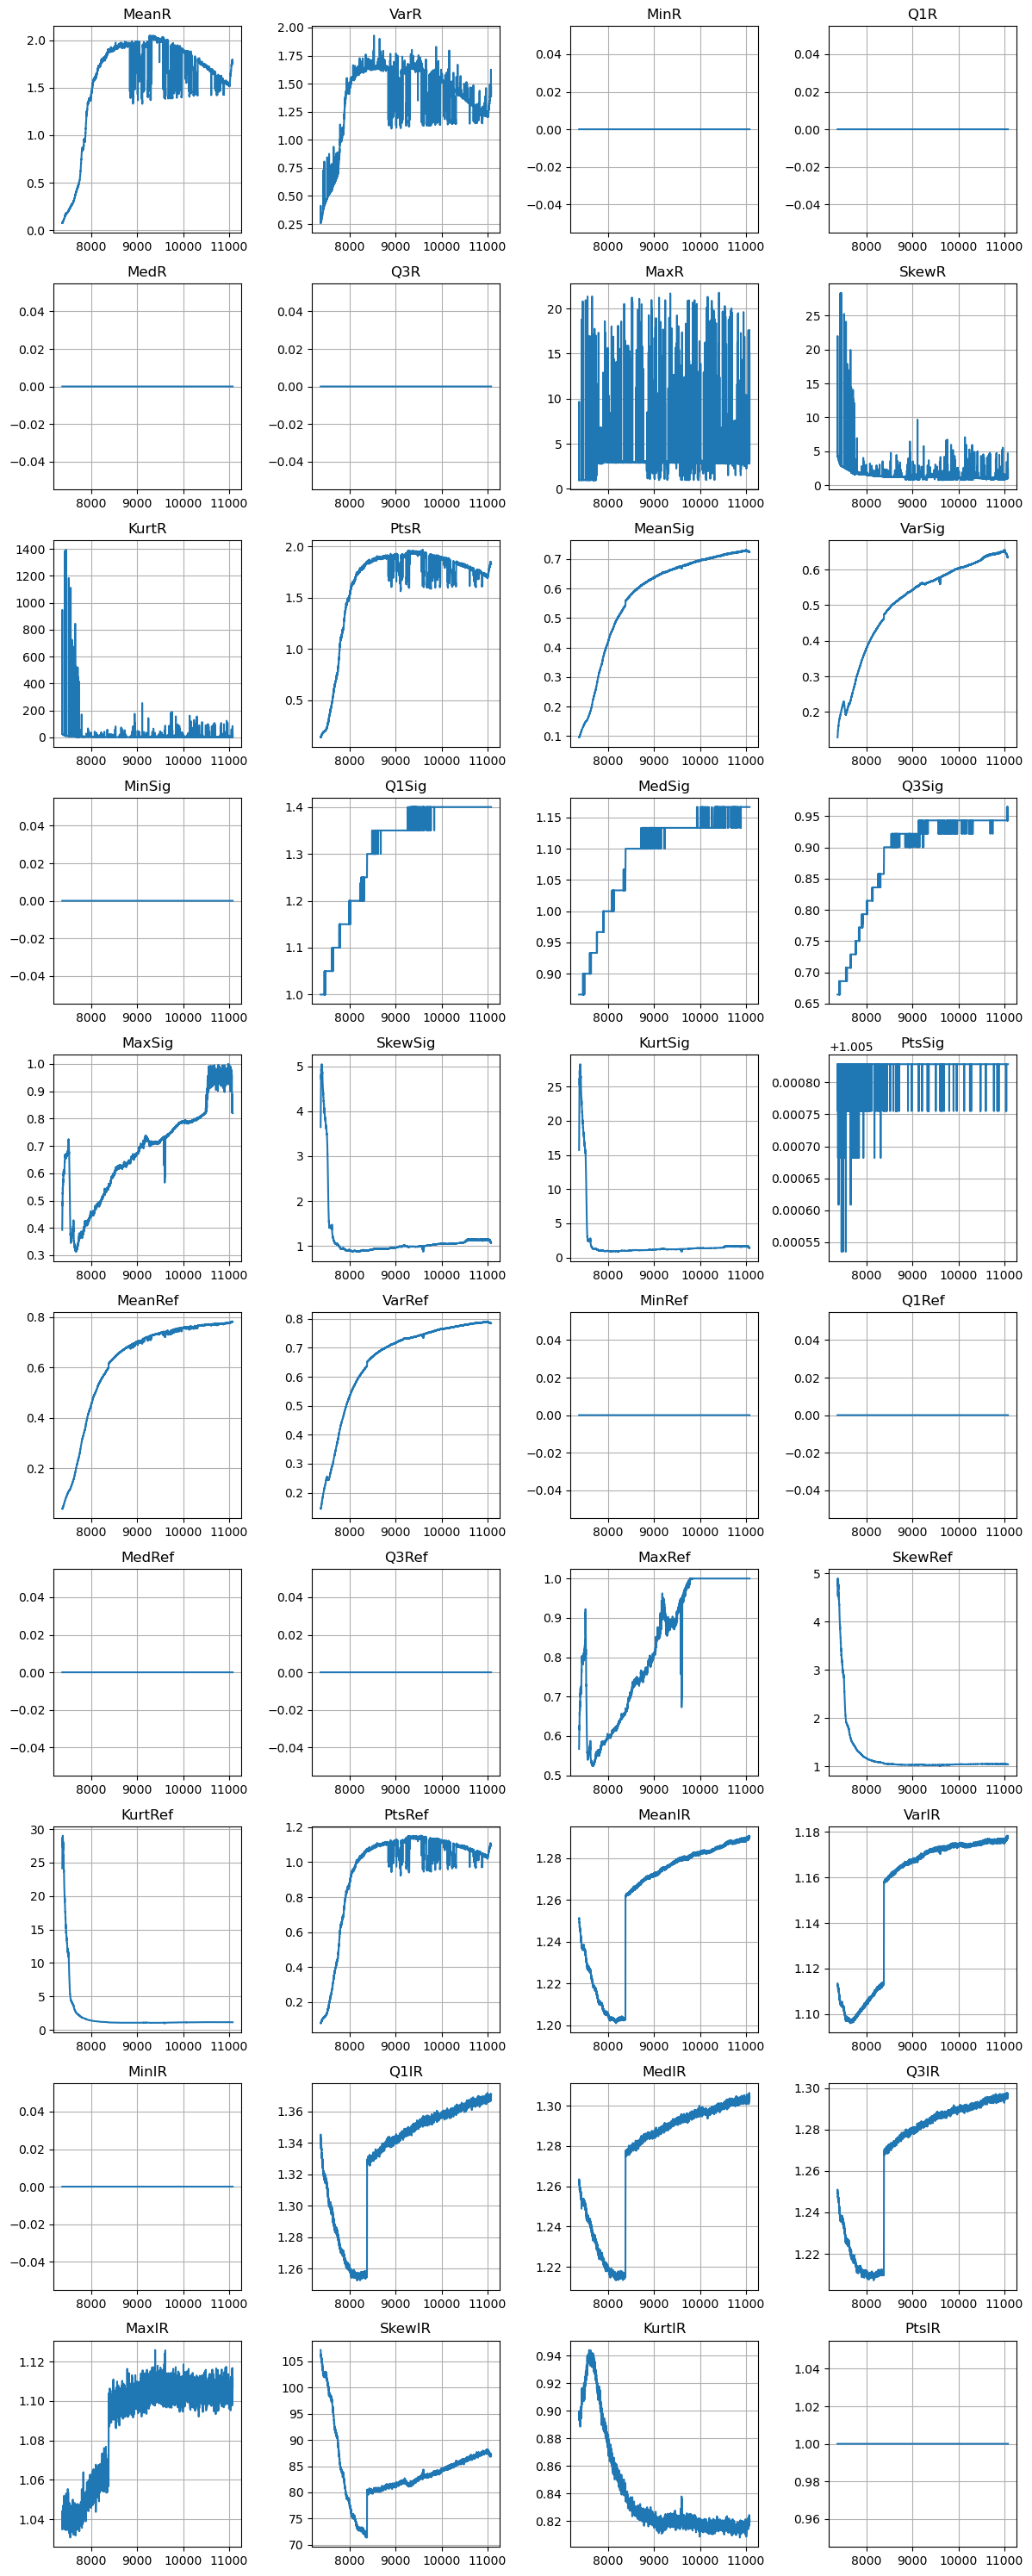

In [95]:
plot_uva(df2, features)

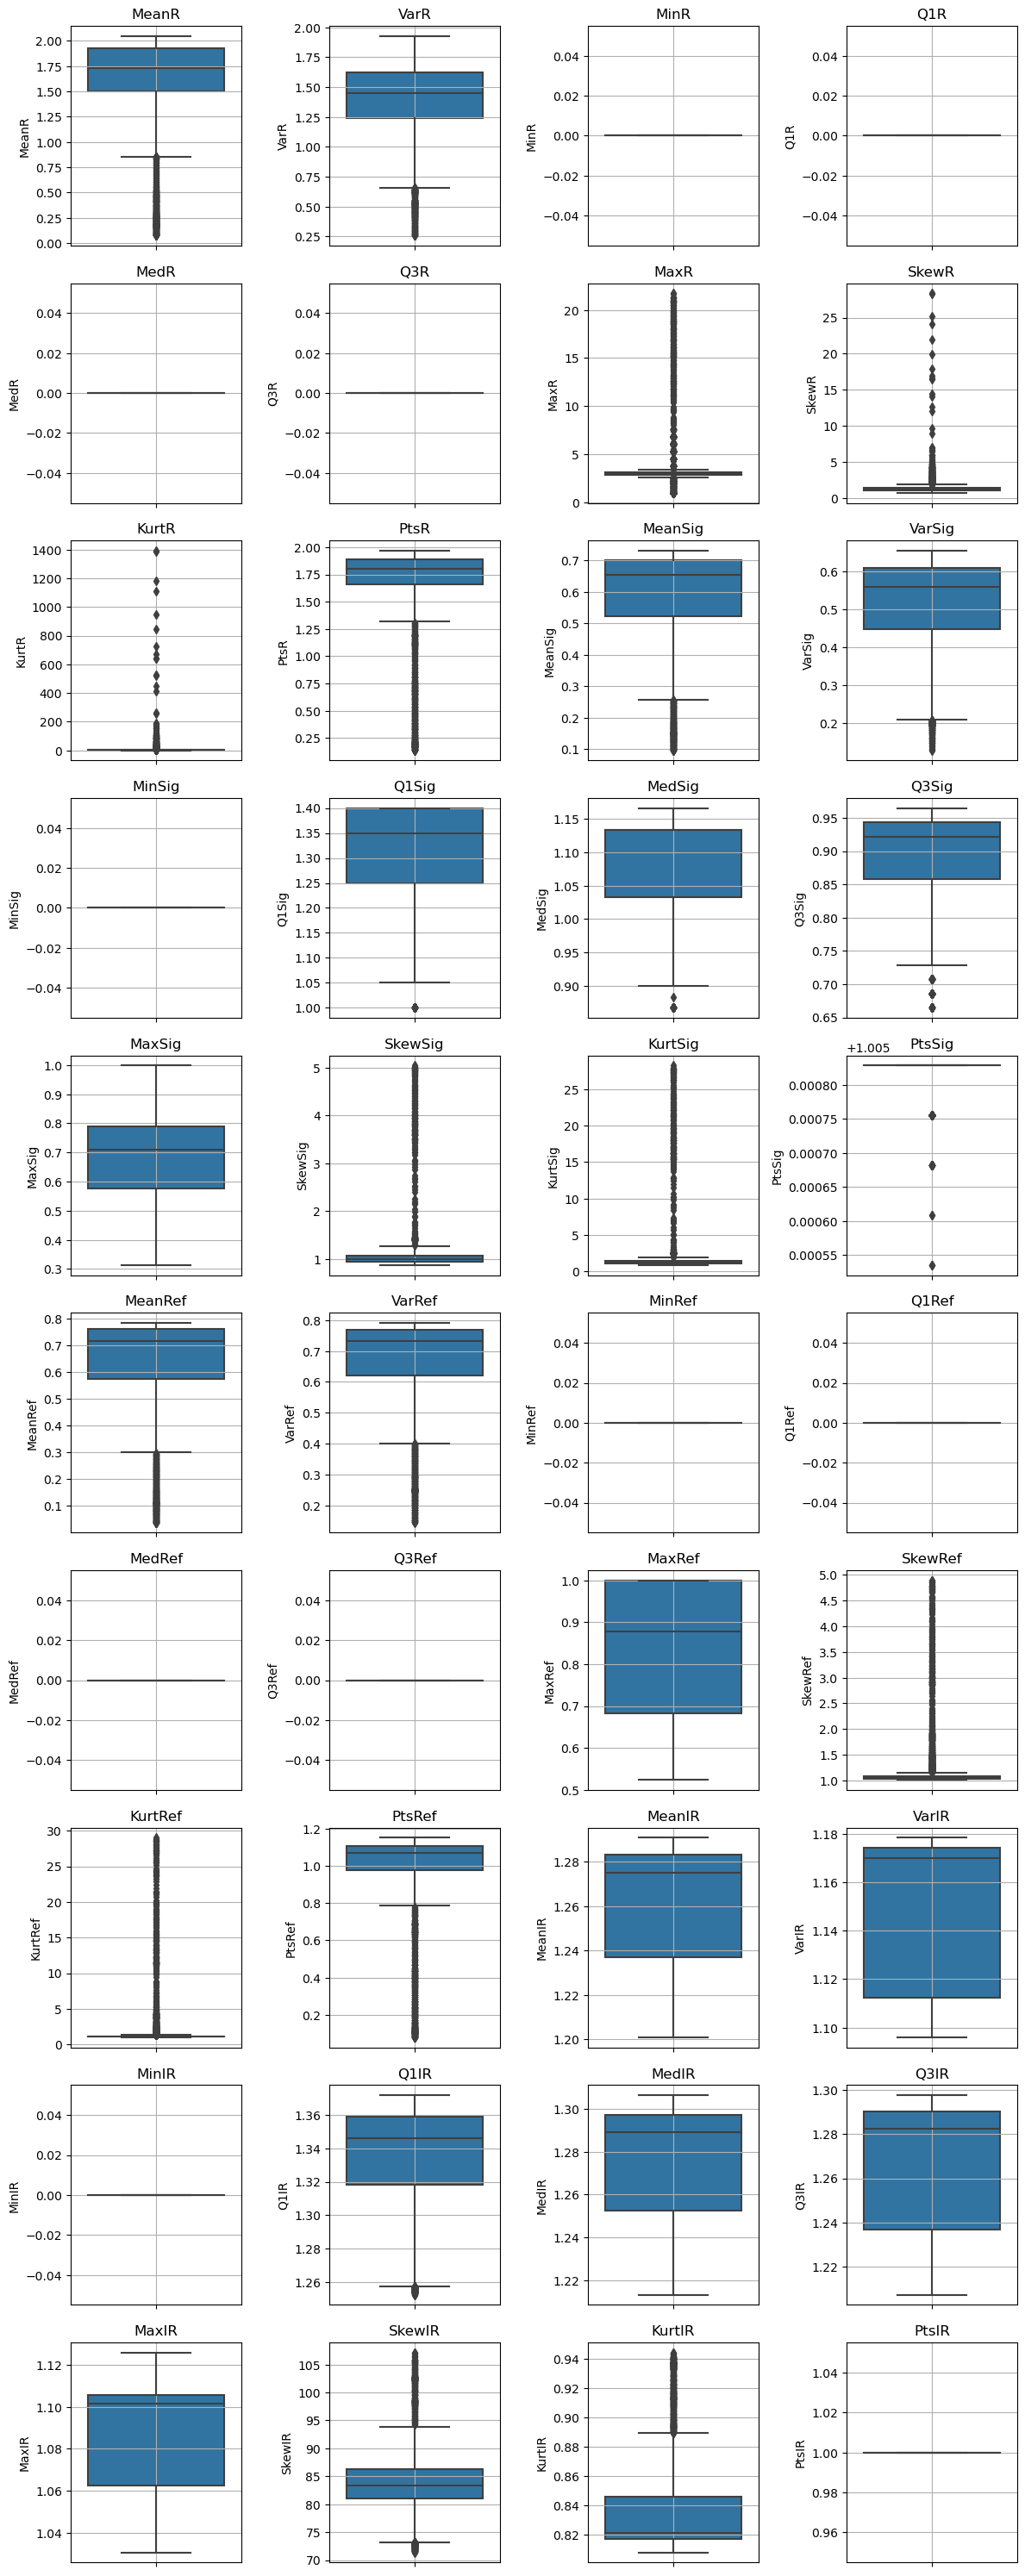

In [96]:
plot_uva(df2, features, plot_type='box')

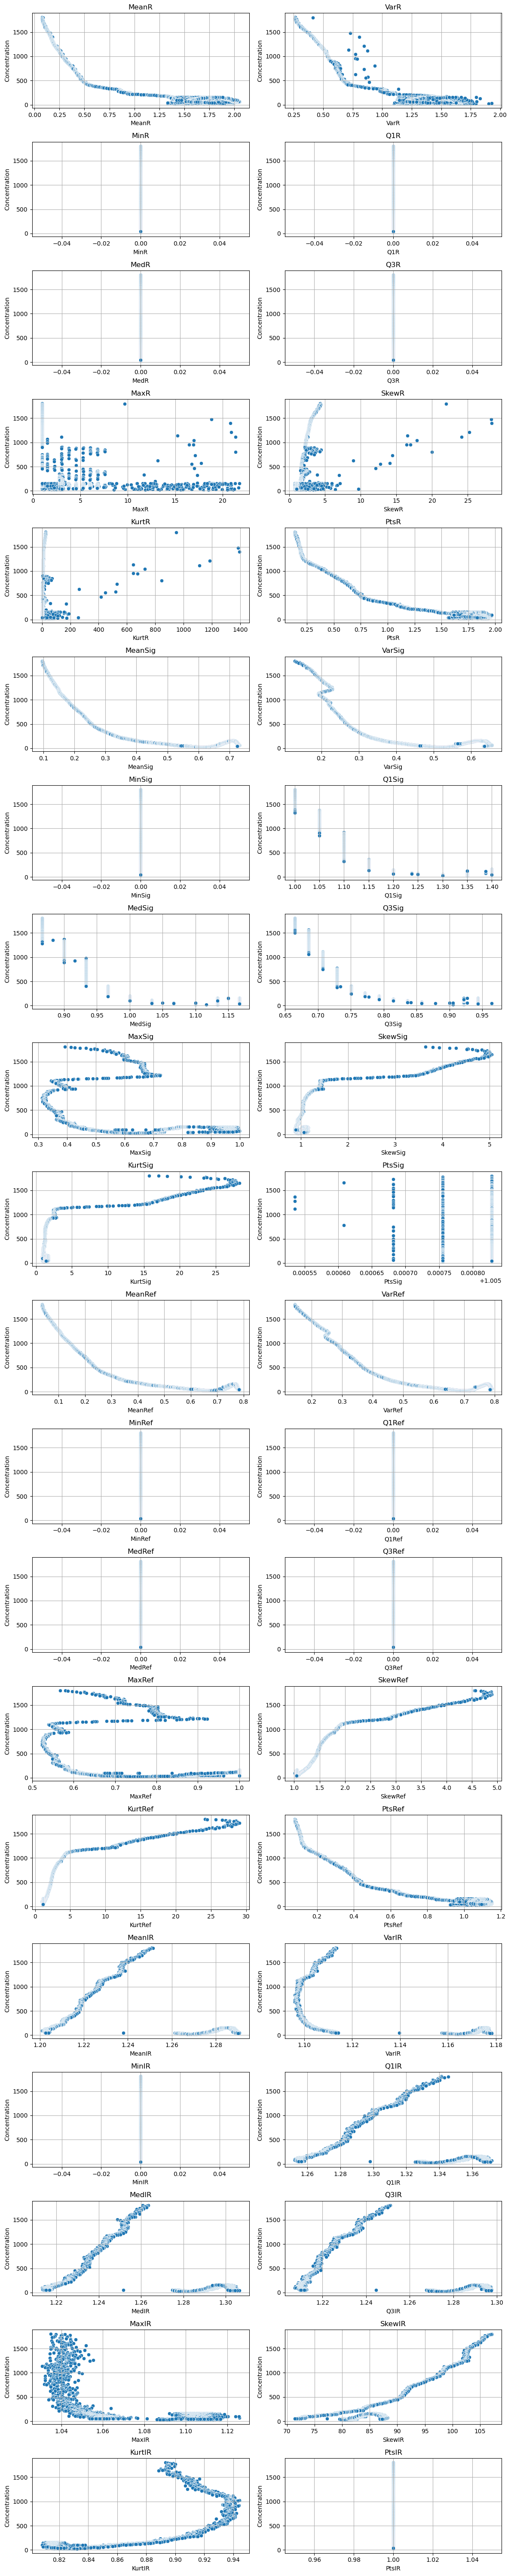

In [97]:
plot_bva(df2, features, target)

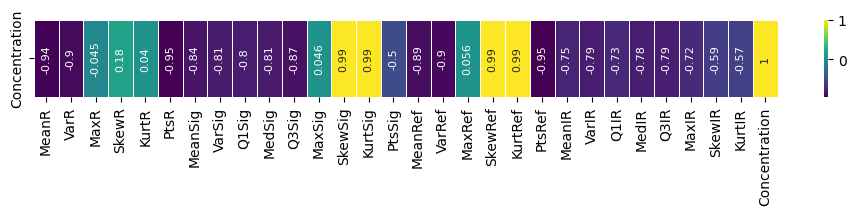

In [176]:
corr_res = plot_corr(df3, features, target)

## Features interdependancy

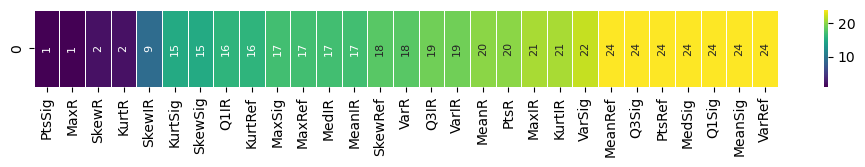

In [175]:
plot_corr(df2, features, plot_type='Features')

# EDA - Experiment 4 Data

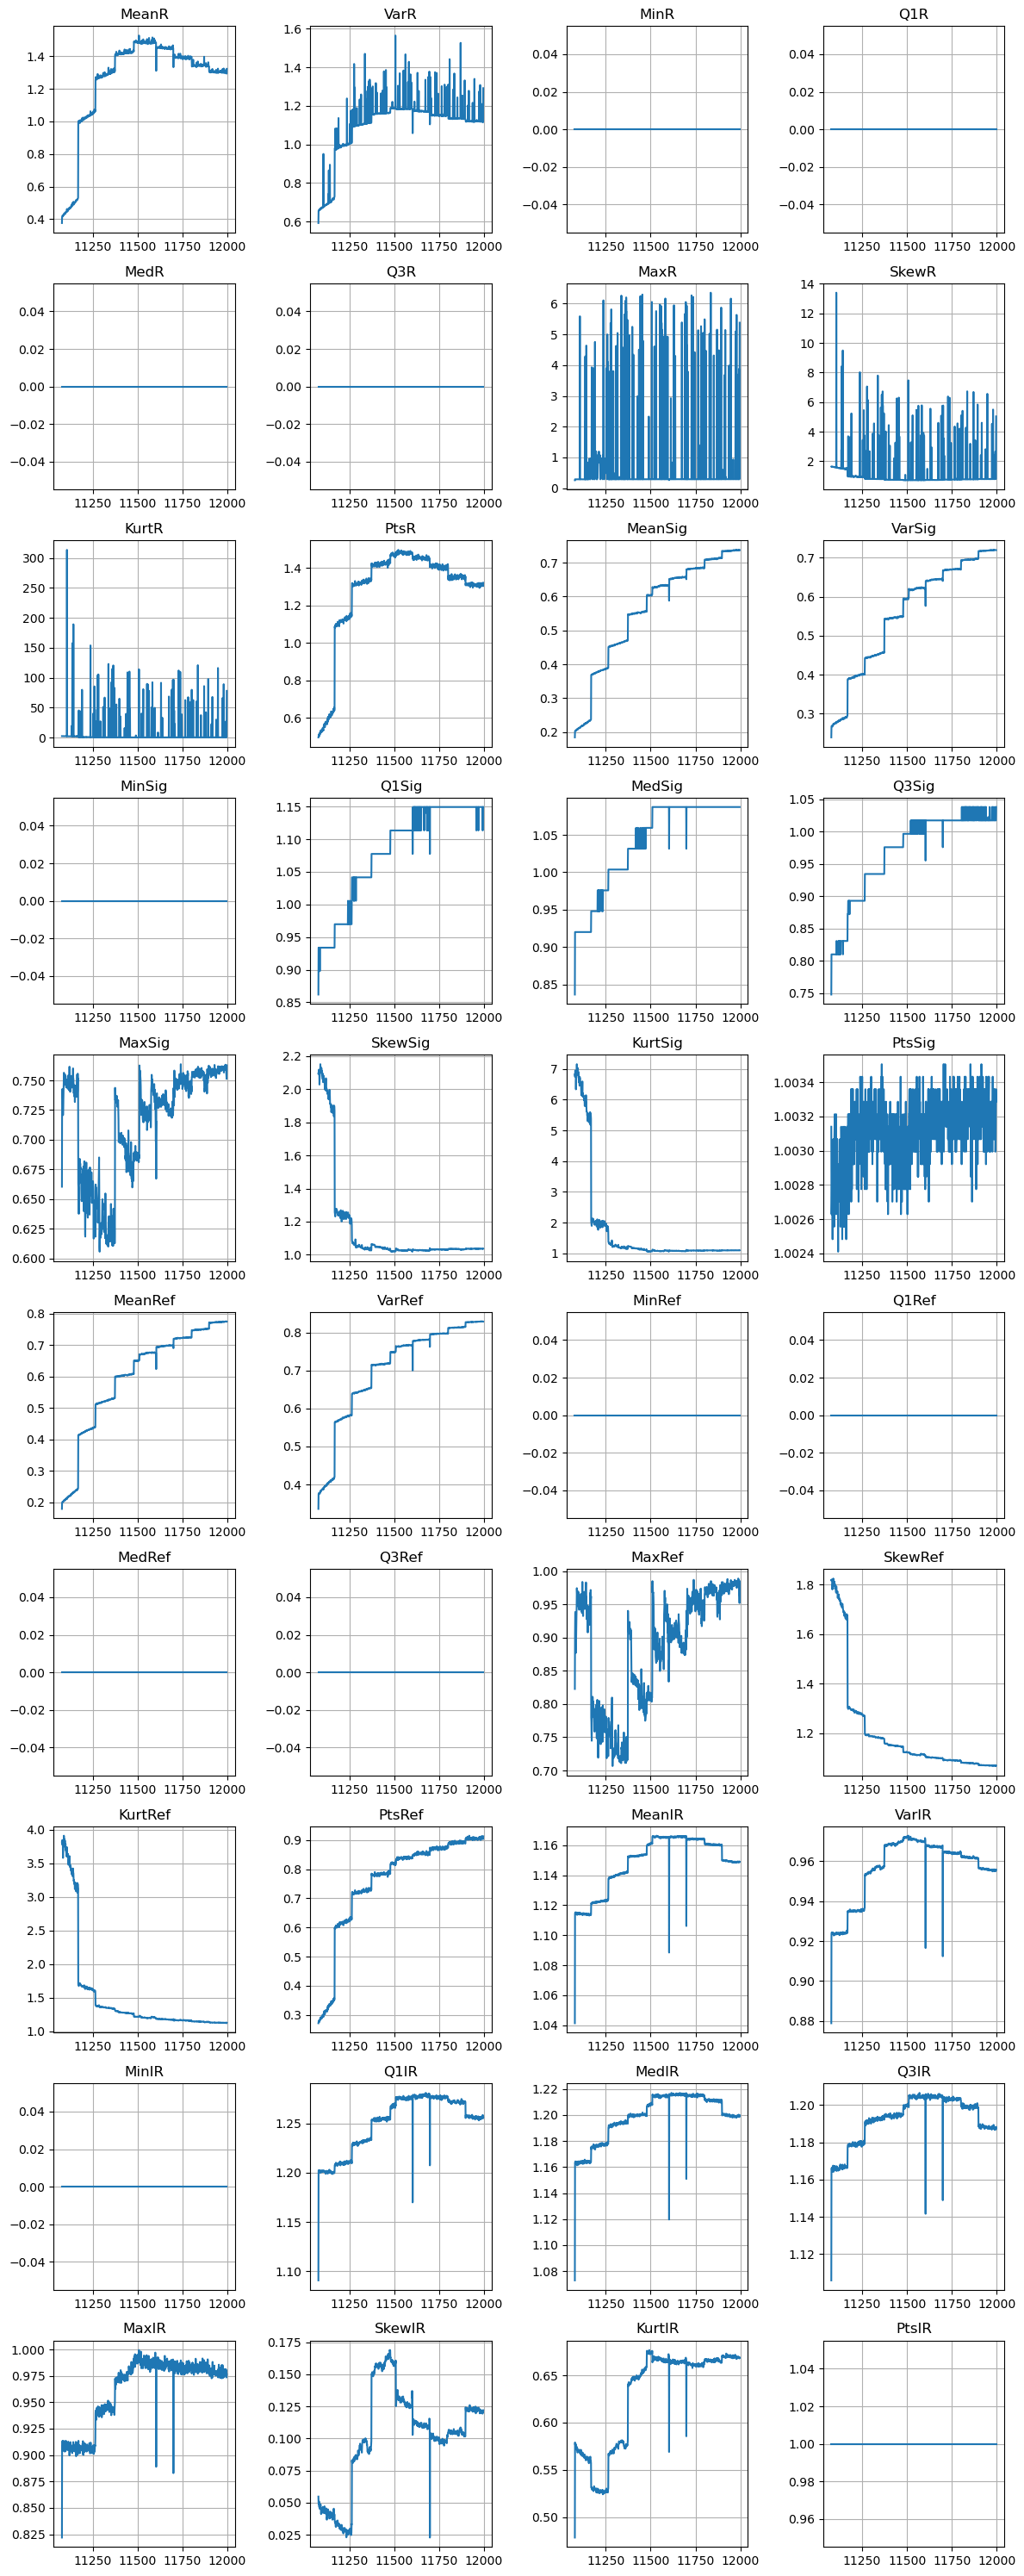

In [99]:
plot_uva(df3, features)

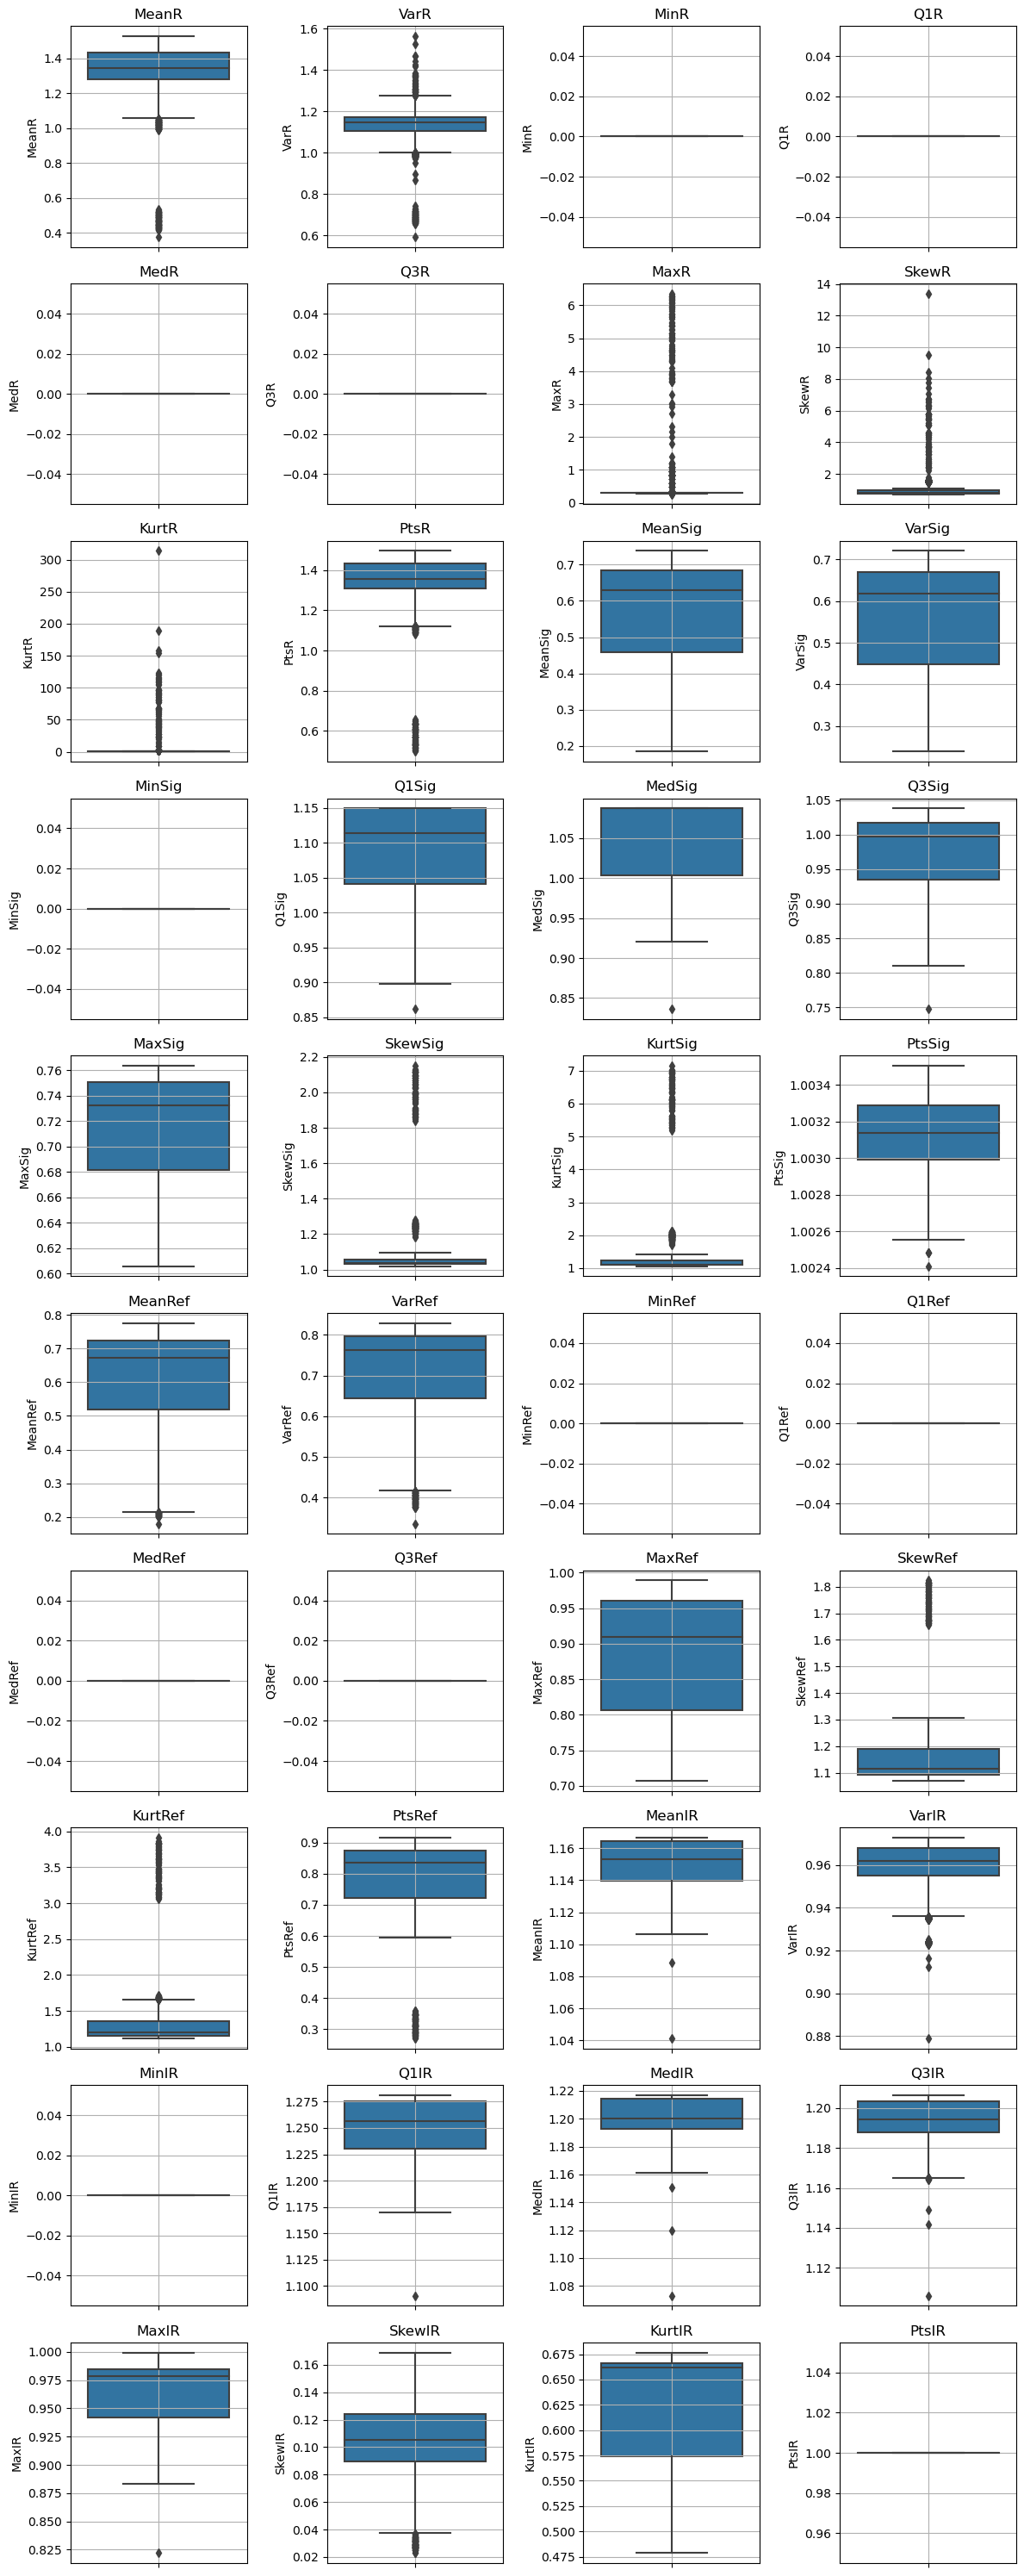

In [100]:
plot_uva(df3, features, plot_type='box')

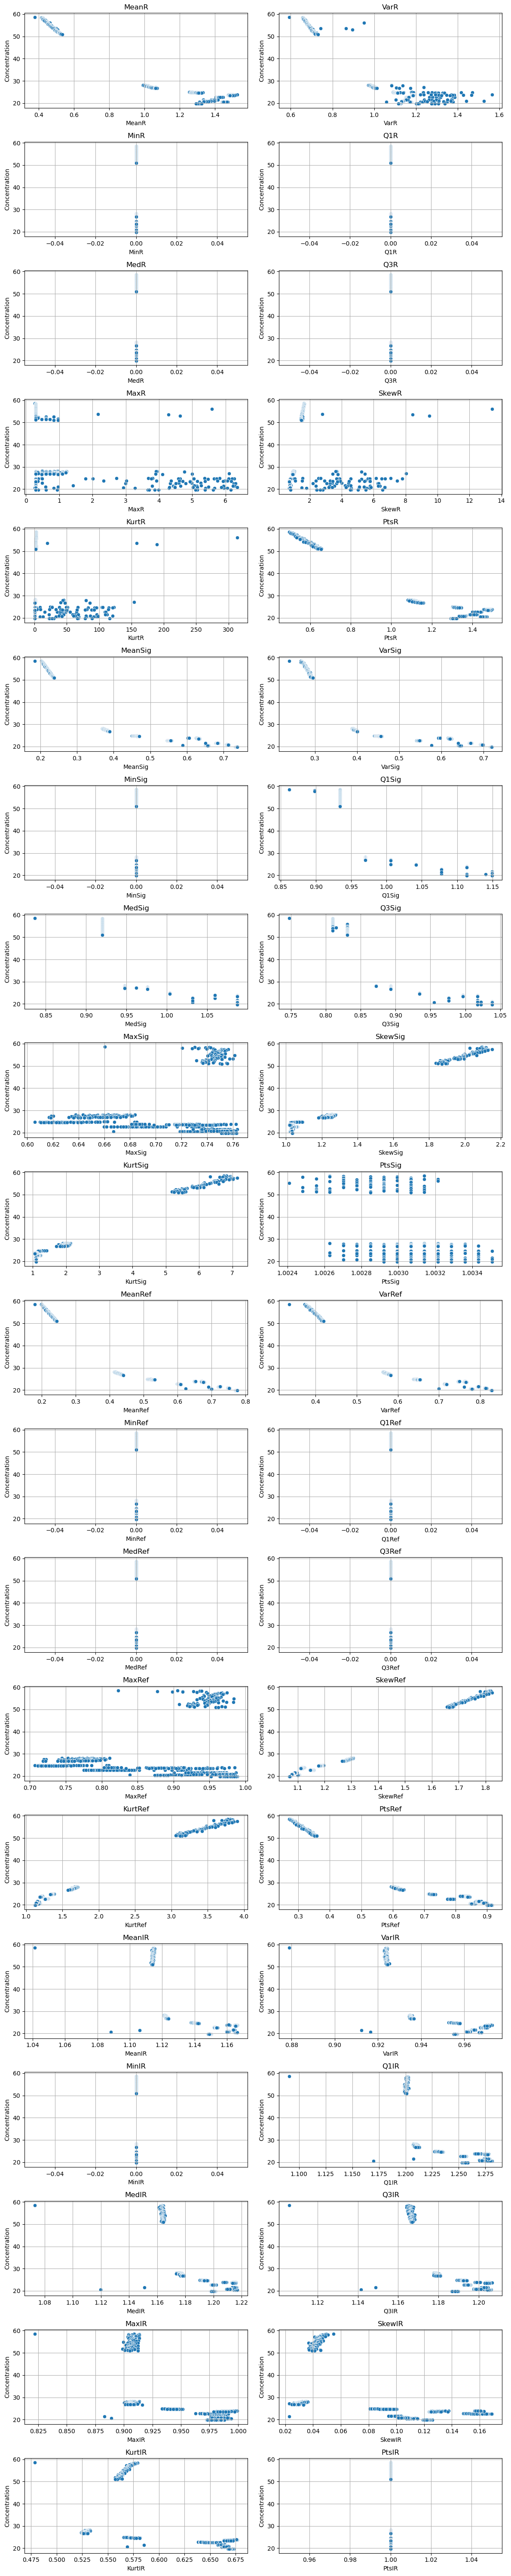

In [101]:
plot_bva(df3, features, target)

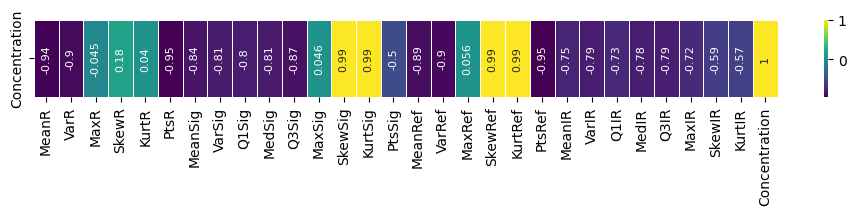

In [174]:
corr_res = plot_corr(df3, features, target)

## Features interdependancy

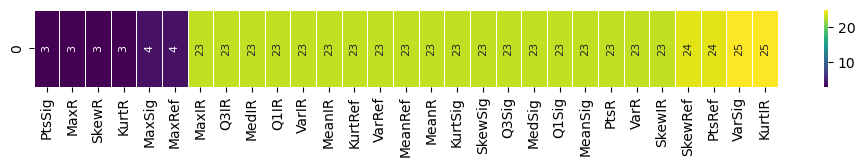

In [173]:
plot_corr(df3, features, plot_type='Features')

# All Experiments Combined

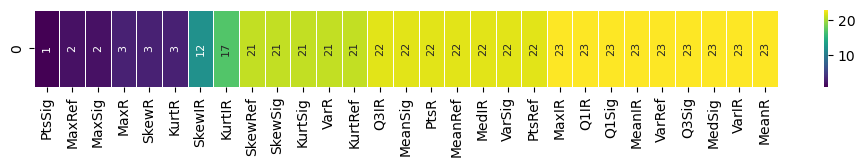